<a href="https://colab.research.google.com/github/jainam-shah1/Python_Projects/blob/main/Ecommerce_product_importance_using_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <center> Clustering Algorithms on Amazon Shopping</center>


>By Jainam Shah



---------------

# 1) Objective
-------
> * Nowadays people are significantly influenced by E-Commerce web-applications. Providing the greatest customer service, delivering shipment and shiping it on time and raising customer satisfaction are all issuses that businesses like Amazon and food dilevery application like DoorDash and Ubereats.</br>
> * Customer statisfaction in the E-commerce application is directly tied with shipment dilevered on time, discount offered to the customer, customer rating and customer care call services. For the customer statisfaction, higher the customer rating, discount offered and customer services, there are higher chance of the *product to be important*. 
> * Our agency aims to provide our stakeholder ***Amazon*** for whom we deliver product to the customer the best insight on their products based on our analysis. 

 

In [ ]:
# Perform arithmetic calculation
import pandas as pd
from pandas import DataFrame
import numpy as np
import random 

#Visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

#K-means
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.neighbors import KNeighborsClassifier

#Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings

# 2) Data Exploration
-----
> Here we have imported the dataset of E - Commerce Shipping data with the help of `.read_csv` function. Below we can see that we have successfully imported the dataset that contains a list of all Customer_ID and their purchased product. 

In [ ]:
ama = pd.read_csv("train.csv")
ama_origin = pd.read_csv("train.csv")

* To show this we are printing out the first 5 rows of our dataset using the `.head()` function. Note that the **Mode_shipment and Product_importance** columns have string values like *flights, ship, road and low medium and high* respectively. We will clean our data to integer to get the desired value of the columns.

In [ ]:
ama.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

* Here we have used `.shape` to get the number of rows and columns of the dataset. From we got that we have **10999** rows and **12** columns in our dataset.

In [ ]:
ama.shape

(10999, 12)

* Now we will use `.describe()` function to shows total number of count, Range, standard Deviation, mean and Quartiles of all the Columns.

In [ ]:
ama.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

* Here I have used `.dtypes` function to get the type of data in all the columsn of the DataFrame. Here we got that **Warehous_block, Mode_of_shipment, Product_importance and Gender** columns have the object data type and rest have int data type.

In [ ]:
ama.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

------
# 3) Data Cleaning:
----------

> First we tried to check if we have any NA values in our dataset using `.isnull()` function and we found that there isn't any null values in our datase.

In [ ]:
#checking null
ama.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
ama = ama.drop(['ID'], axis = 1)
ama_origin = ama_origin.drop(['ID'], axis = 1)

* In order to achieve better results in the clustering process, we have now performed mapping on the columns containing datatype object values to transform them into integer values. In the Gender column, we changed `M to 1` and `F to 0`, and in the **Warehouse block**, we changed **A, B, C, D, and F to 1, 2, 3, 4 and 5, respectively**. Next, we changed **low, medium, and high into 1, 2 and 3** respectively, in the **Product importance** column, and finally, we changed **road, ship, and flight into 1, 2 and 3, respectively**, in the **Mode of Shipment** columns.

In [ ]:
# replacing values
#ama['Gender'].replace(['M', 'F '],[1, 2], inplace=True)
#ama['Warehouse_block'].replace(['A', 'B', 'C', 'D', 'F'],[1,2,3,4,5], inplace=True)
#ama['Product_importance'].replace(['low', 'medium', 'high'],[1,2,3], inplace=True)
#ama['Mode_of_Shipment'].replace(['Road', 'Ship', 'Flight'],[1,2,3], inplace=True)
#ama.head()

In [ ]:
ama['Gender'] = ama['Gender'].map(dict(M=1, F=0))
ama['Warehouse_block'] = ama['Warehouse_block'].map(dict(A=1, B=2, C = 3, D = 4, F = 5))
ama['Product_importance'] = ama['Product_importance'].map(dict(low=1, medium=2, high = 3))
ama['Mode_of_Shipment'] = ama['Mode_of_Shipment'].map(dict(Road=1, Ship=2, Flight = 3))


* Here we used `.head()` function again to confirm our cleaning of the dataframe.

In [ ]:
ama.head()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                4                 3                    4                2   
1                5                 3                    4                5   
2                1                 3                    2                2   
3                2                 3                    3                3   
4                3                 3                    2                2   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0                  177                3                   1       0   
1                  216                2                   1       1   
2                  183                4                   1       1   
3                  176                4                   2       1   
4                  184                3                   2       0   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

---------
# 4) Data Adaptation
-------

> We again used the `.shape()` function to check if there is change in our dataset. We didn't see any changes in the Dataframe.

In [ ]:
ama_origin.shape

(10999, 11)

* Here we have tried to add two columns in the dataframe one is for the delivery charges and other the product cost. Here delivery charges are taken with the help of `random.rand()` function and is depended on the mode of shipment like the charges for the product shiped on flight varies from **21 to 30**.

In [ ]:
#Adding two columns
ama['Del_Price'] = 0
ama['Product_total_cost'] = 0

In [ ]:
ama_origin.iloc[1,2]

4

In [ ]:
for i in range (0,10999):
    if ama.iloc[i,1]  == "Flight":
        ama.iloc[i,11] = random.randint(21, 30)
    elif ama.iloc[i,1] == "Ship":
        ama.iloc[i,11] = random.randint(11, 20)
    else:
        ama.iloc[i,11] = random.randint(0, 10)
        

* Here **Product_total_cost** is calulated by cost of product, discount offered and the dilevery charges. 

In [ ]:
ama['Product_total_cost'] = (ama["Cost_of_the_Product"]-(ama["Cost_of_the_Product"]*(ama["Discount_offered"]/100)))+ama["Del_Price"]
ama_origin['Product_total_cost'] = ama['Product_total_cost']
ama_origin['Del_Price'] = ama['Del_Price']

In [ ]:
ama.head()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                4                 3                    4                2   
1                5                 3                    4                5   
2                1                 3                    2                2   
3                2                 3                    3                3   
4                3                 3                    2                2   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0                  177                3                   1       0   
1                  216                2                   1       1   
2                  183                4                   1       1   
3                  176                4                   2       1   
4                  184                3                   2       0   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Del_Price  \
0                44           1233                    1          4   
1                59           3088                    1         10   
2                48           3374                    1         10   
3                10           1177                    1          8   
4                46           2484                    1         10   

   Product_total_cost  
0              103.12  
1               98.56  
2              105.16  
3              166.40  
4              109.36

* Here we have used `.dtypes` to get the information of the two columns which we added in the DataFrame.

In [ ]:
ama.dtypes

Warehouse_block          int64
Mode_of_Shipment         int64
Customer_care_calls      int64
Customer_rating          int64
Cost_of_the_Product      int64
Prior_purchases          int64
Product_importance       int64
Gender                   int64
Discount_offered         int64
Weight_in_gms            int64
Reached.on.Time_Y.N      int64
Del_Price                int64
Product_total_cost     float64
dtype: object

-------------

# 5) Visualization
-------------

>


> ### Plot 1 - Heatmap
- Here we have used heatmap to find correlation between each column in the dataframe.


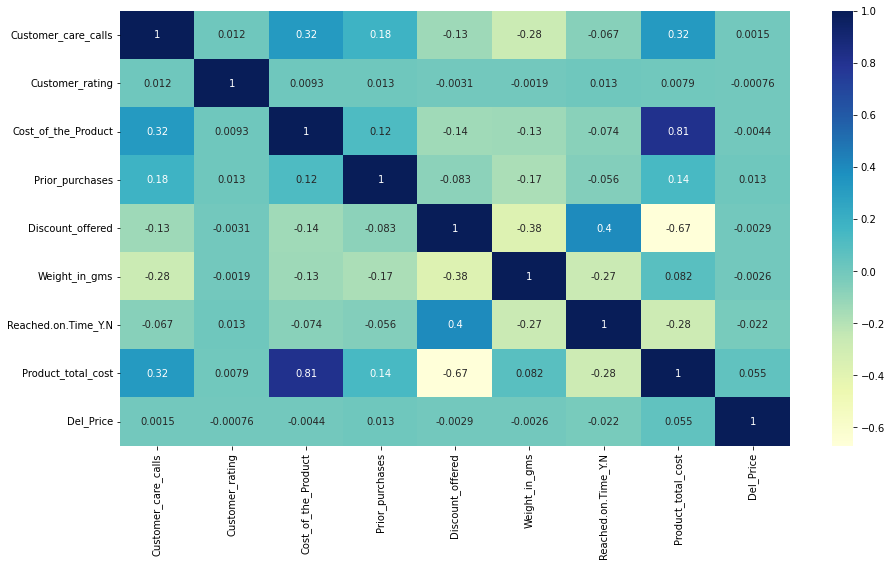

In [ ]:
#Checking correlation
plt.rcParams["figure.figsize"] = (15, 8)
sns.heatmap(ama_origin.corr(), cmap="YlGnBu", annot=True);

* Here as we can see from the above heatmap the relation between all the columns of the DataFrame and we found out that there is strong co-relation between **Cost_of_the_product** and **Product_total_cost**. Taking about the negative correlation the columns **Discount_offered** and **product_total_cost** have the strong negative correlation.

-----

> ### Plot 2 - Bar plot
- Using bar plot we can denote the count of each variable in each column.

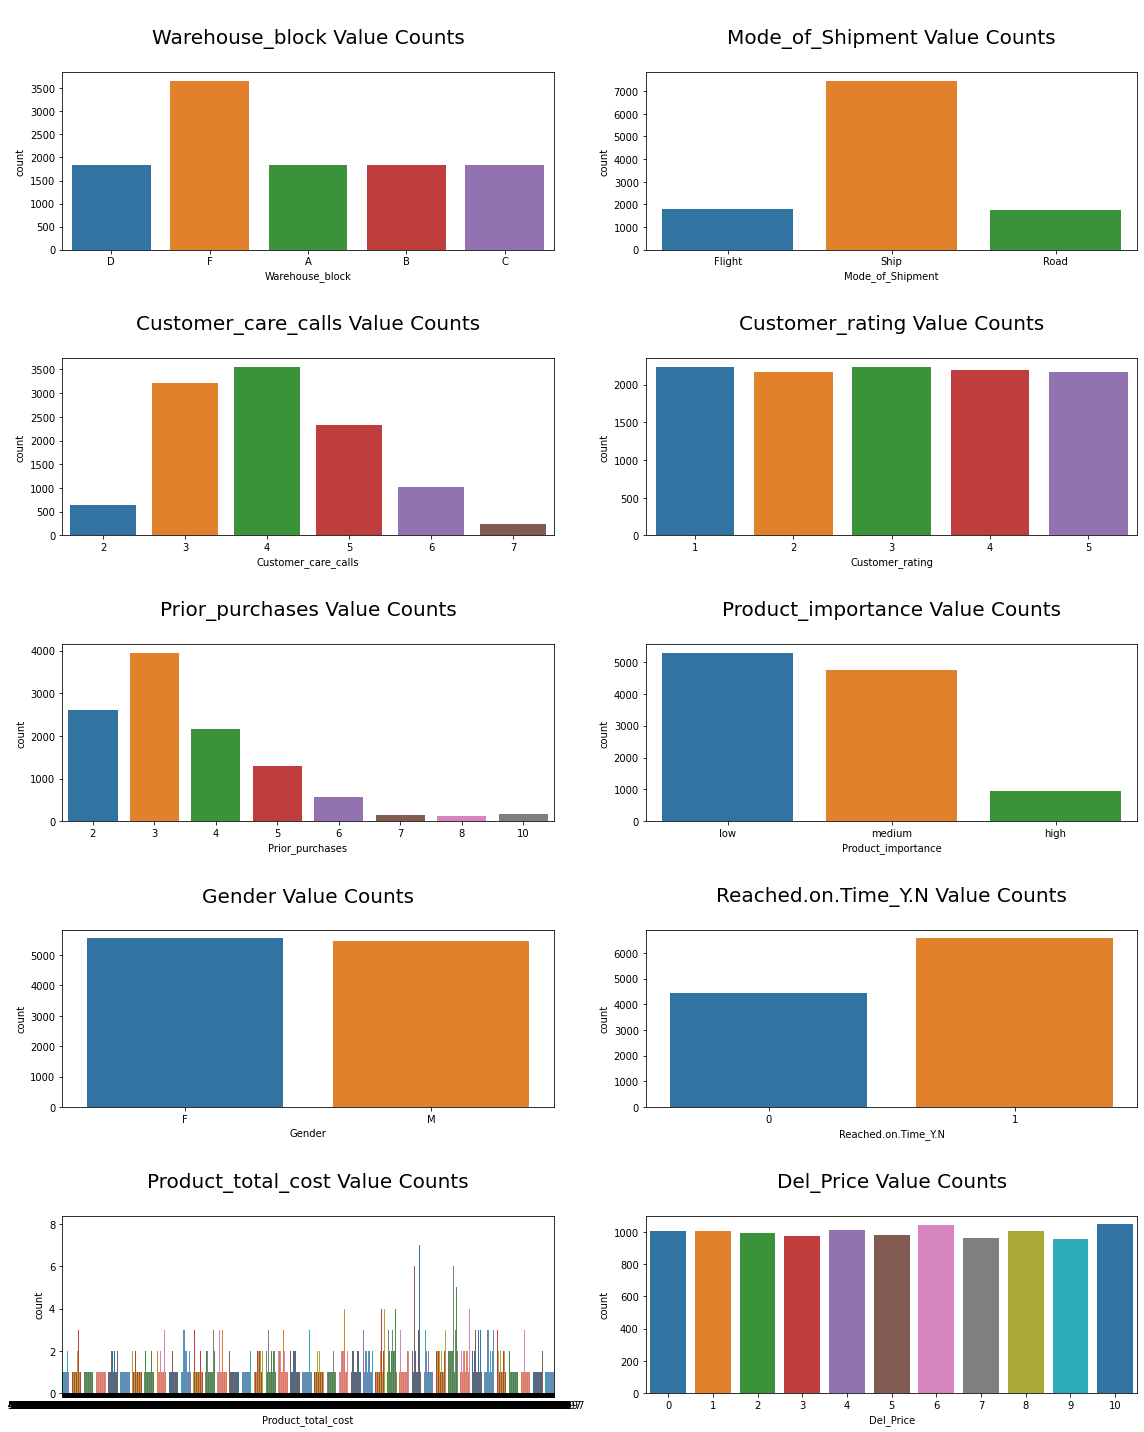

In [ ]:
# creating a list of categorical coumns
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N','Product_total_cost','Del_Price']

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = ama_origin, ax = ax, palette='tab10')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

* From the above charts we can clearly observe that:<br>
  * Warehouse F has the highest value counts as compared to other four.
  * In the second plot we can conclude that, mostly used way of delivery is through ship.<br>
  * From the third plot we can conclude that, most of the product have **4** customer care call services.<br>
  * 4th plot we can see that number of customer ratings have almost same count.
  * In the 5th plot we can see that most of the product are purchased atleast 3 times.
  * 6th plot suggest that number of product having high importance are very low.
  * Comparing the gender columns from the barplot we see that the number of female and male purchased the product are almost same.
  * From 8th plot we can see that most of the product is reaching on time compare to others.
  * In the 9th plot we can see that total product cost are not equal as they are likely depended on the mode of shipment delivery charges.
  * Lastly, from the 10th plot we can see most of the product have delivery charges between 11 to 20 as the most of the product are shipped through ship.

-------------------

> ### Plot 3 - Pie Plot
* Using Pie plot we can get distribution of each variable in each categorical columns.

In [ ]:
cat_col =["Warehouse_block","Mode_of_Shipment","Product_importance","Gender"] #Using categorical columns to make a pie chat
ama_cat = ama_origin[cat_col]

for i in range(len(cat_col)):
    warehouse = ama_cat.iloc[:,i].value_counts().reset_index()
    warehouse.columns = [ama_cat.columns[i], 'value_counts']
    fig = px.pie(warehouse, names = ama_cat.columns[i], values = 'value_counts', title=ama_cat.columns[i],
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,hole = 0.5)
    fig.update_layout(title_x = 0.5, title_y = 0.85)
    fig = fig.update_traces(textinfo = 'percent+label')
    fig.show()


* From the above pie plot we can conclude following results:- 
   1) Ware_house_block: Block F have the highest number of product that is **33.33%** and other blocks have almost the same number of product.
   2) Mode_of_shipment: Most of the product are transported by **ship** and it has the stack of **67.8%**.
   3) Product_importace: **48.2%** of the products have low importance and the product with high importance are only **8.62%**.
   4) Gender: Here we can see the minor different between the genders who ordered the products from the web application that is **0.8%**.
------------


> ### Plot-4: Dist plot:
  * We used the`.distplot()` function to get the the univariate distribution of our data.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



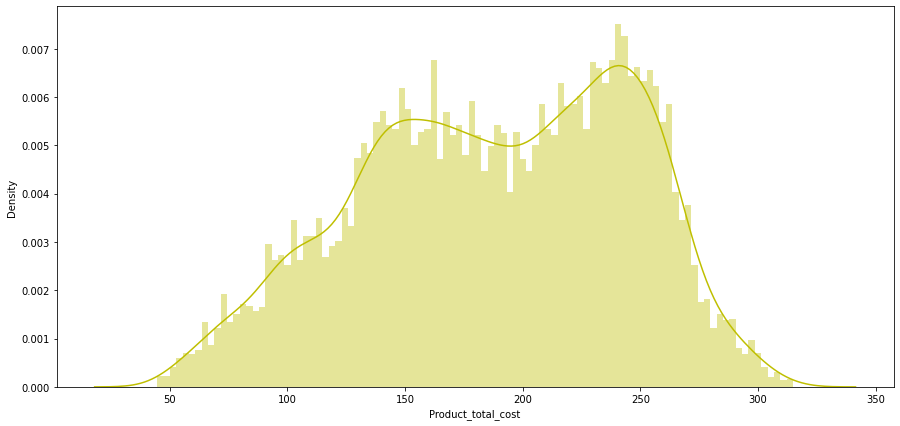

In [ ]:
#making dist plot of the new column we added names delivery price
plt.figure(figsize = (15, 7))
ax = sns.distplot(ama['Product_total_cost'], bins = 100, color = 'y')

plt.show()

* Here we can see that the Product_total_cost around 250 has the highest density, by which we can conclude that product with the cost around 250 are the more.
---------------

> ### Plot 5: Pair plot: 
  * Here we have used the `pairplot()` function to get the pair wise relationship of the DataFrame.

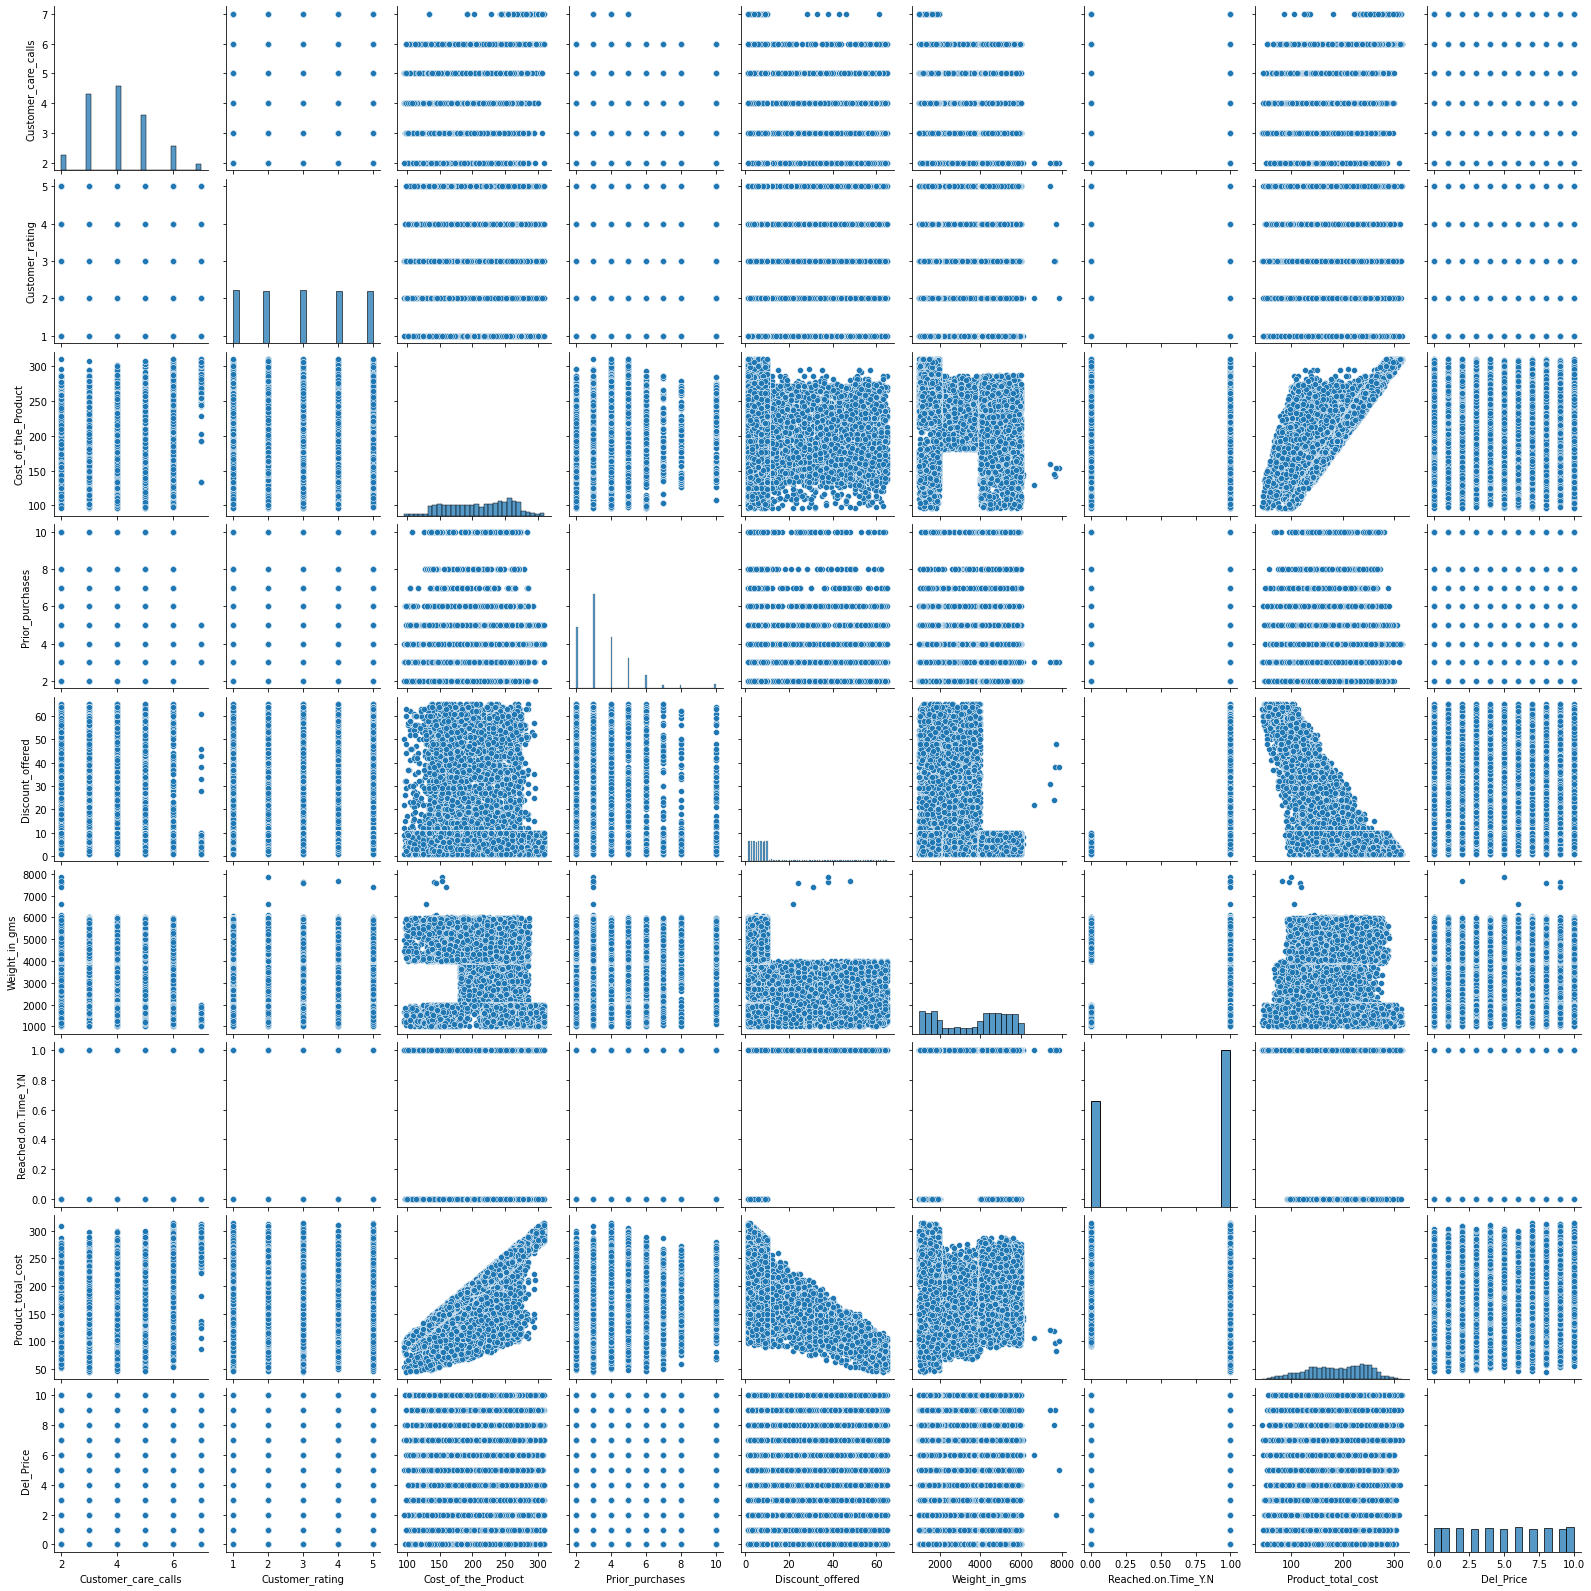

In [ ]:
sns.pairplot(ama_origin)

* From the above plot we can analyze that the columns weight in grams and Cost of the product shows some clusters in the scattered plot.
* Similarly, columns weight in gram and delivery price, Discount offered and Cost of product and Delivery price and product total cost shows some cluster in the plot. 
- which we can use in the further analysis.

-----------------------

> ### Plot 6: Boxplot:-
  * Here we have used `.box()` function to plot boxplot to display the summary of the relation between two columns.<br>
      1) Relation between **Product Importance and distance offered.**<br>
      2) Relation between **Customer care call and Cost of the Product.**

In [ ]:
px.box(data_frame = ama_origin, x = 'Product_importance', y ='Discount_offered', color = 'Product_importance',
       template = 'plotly_dark')

* Here we can observe from the above plot that product with high importance has the highest discount offered compare to other product.

In [ ]:
px.box(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data_frame = ama_origin, color = 'Customer_care_calls',
       template = 'plotly_dark')

* Here we can see the relation between the customer care call and cost of the product and from that we can analyze that product with high cost have highest customer care calls compare to others and the product with least cost have the less customer care calls.

> Below are the images of the box plot that was created, this code works fine in colab notebook but it has issue in juypter and when converted into a html file, the visualization are blank hence i have attached them as images.
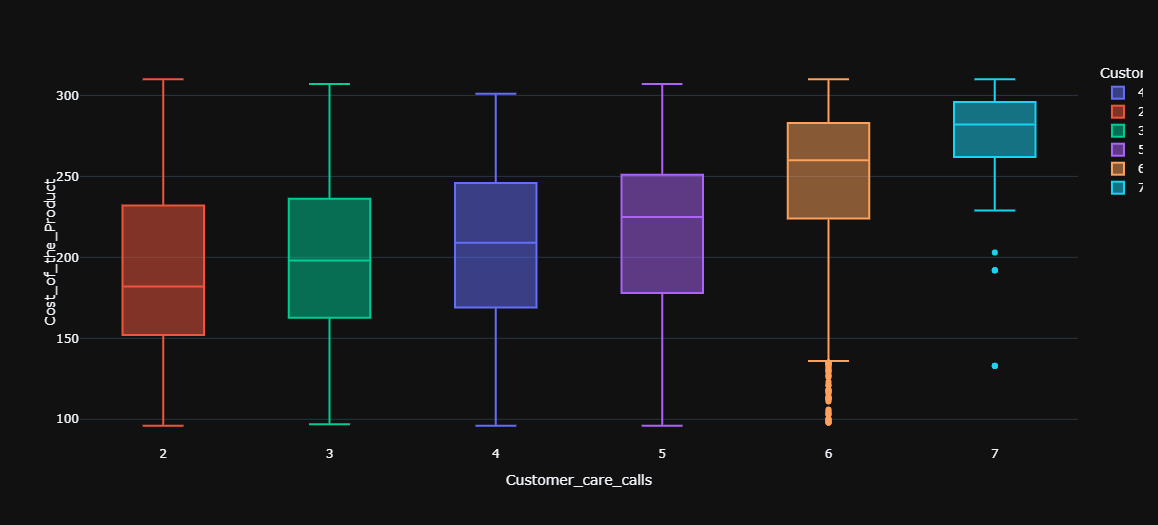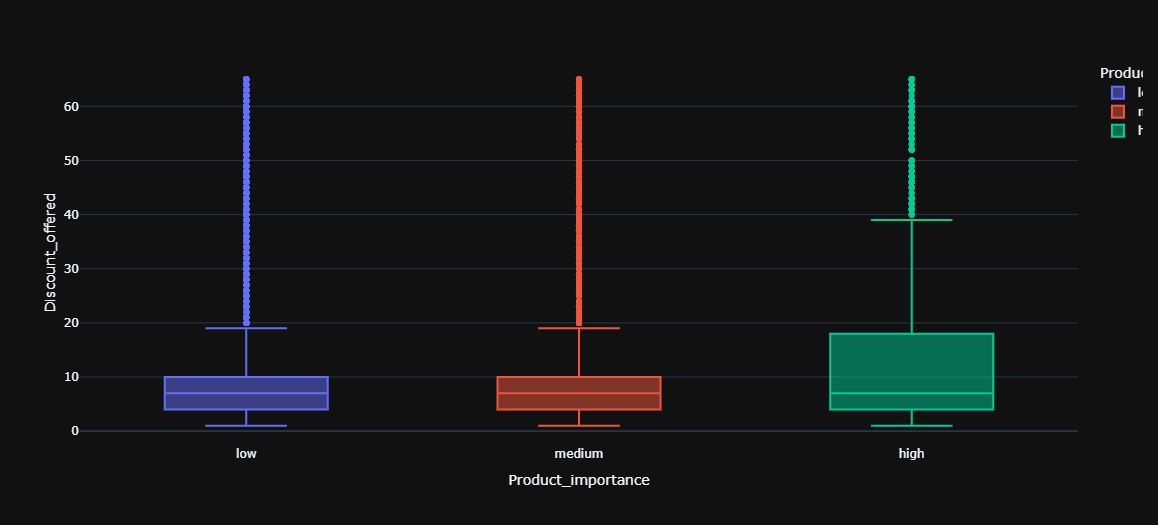

## Cluster Analysis
  > * Here used sklearn's euclidean_distances function to find the distance between every pair of words in the dataframe.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
ama_distance_df = DataFrame(euclidean_distances(ama))
ama_distance_df.head()

0            1            2            3            4      \
0     0.000000  1855.489098  2141.025026    91.226961  1251.053531   
1  1855.489098     0.000000   288.240455  1913.255672   605.099694   
2  2141.025026   288.240455     0.000000  2198.194791   890.016652   
3    91.226961  1913.255672  2198.194791     0.000000  1308.767192   
4  1251.053531   605.099694   890.016652  1308.767192     0.000000   

         5            6            7            8            9      ...  \
0   193.066500  1150.176328  1572.224565   630.638585    52.052112  ...   
1  1673.318858   735.251062   286.397207  1230.470172  1902.063799  ...   
2  1957.954892  1016.279822   572.718081  1514.251827  2187.218151  ...   
3   241.038556  1199.064306  1628.873481   684.951100    56.285003  ...   
4  1068.531722   195.163161   324.364055   625.745139  1297.324218  ...   

         10989        10990        10991        10992        10993  \
0   388.503111   186.429011   167.449551   690.142768   197.394468   
1  1489.908867  1994.348033  1867.857998  1191.684610  1945.819539   
2  1774.783753  2279.506427  2153.229835  1475.637902  2230.948039   
3   430.138722   103.754811   125.267522   734.997354   125.329410   
4   887.979707  1391.330344  1267.035210   595.972880  1344.957146   

         10994        10995        10996        10997        10998  
0   353.552612   136.354544   174.586483   138.458717   410.821587  
1  1559.839494  1845.926366  1939.079776  1883.108590  1452.111132  
2  1844.367009  2131.147918  2224.276715  2168.158570  1736.280119  
3   380.598064   105.242113   101.021416    82.257277   462.926225  
4   961.309011  1243.629912  1337.268710  1280.562545   847.358812  

[5 rows x 10999 columns]

# 6) Step-by-step hierarchical clustering:
------------

###AgglomerativeClustering

* Here we used `.scatter()` function to plot a scatter plot between Cost_fo_the_product and Weight_in_gms.

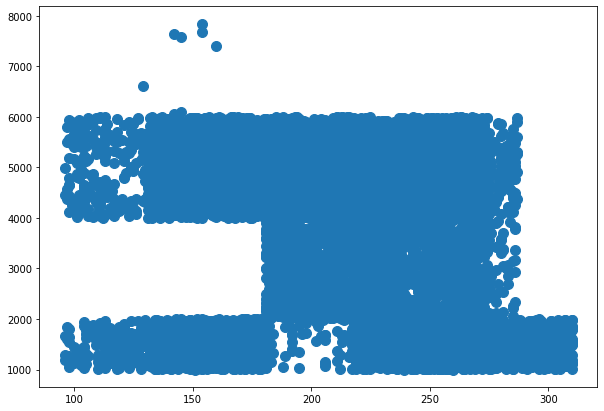

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(ama["Cost_of_the_Product"],ama["Weight_in_gms"],s = 100)

-----------
* Here we used `Agglomerative clustering()` function to creates an agglomerative clustering object with 4 clusters and euclidean affinity.


In [ ]:
#AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

* Here we used `fit_predict()` from agglomerative clustering library to create an initial prediction model based on all our DataFrame.
* We created the culstering algorithm which we used to cluster the data. Here our data is clustered in to 3 clusters.

In [ ]:
cl = ama[['Cost_of_the_Product','Weight_in_gms']]
#perfom the actual clustering
cluster = AgglomerativeClustering(n_clusters= 4, affinity = 'euclidean',linkage = 'ward')
clc_pre = cluster.fit_predict(cl)
clc_pre

array([1, 2, 2, ..., 1, 1, 1])

In [ ]:
ama['cluster']=clc_pre
ama[['Cost_of_the_Product','Weight_in_gms','cluster']].head()

Cost_of_the_Product  Weight_in_gms  cluster
0                  177           1233        1
1                  216           3088        2
2                  183           3374        2
3                  176           1177        1
4                  184           2484        2

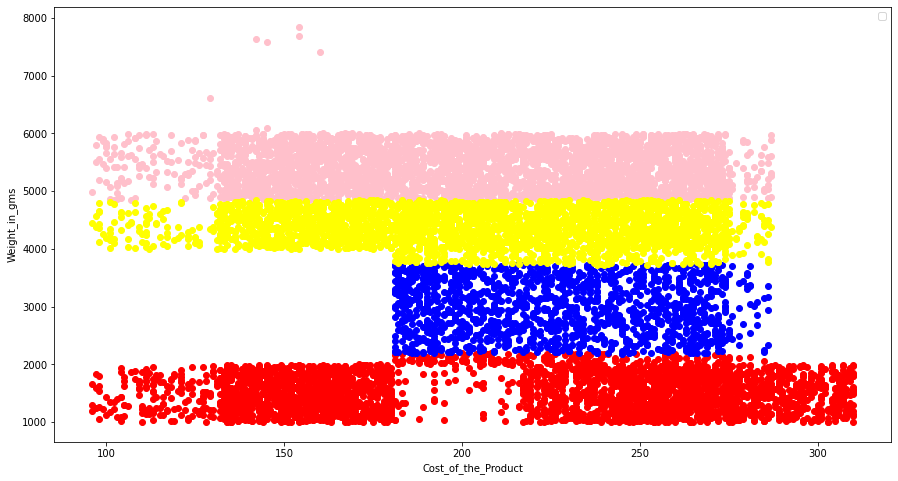

In [ ]:
df1 = ama[ama.cluster==0]
df2 = ama[ama.cluster==1]
df3 = ama[ama.cluster==2]
df4 = ama[ama.cluster==3]
plt.scatter(df1['Cost_of_the_Product'],df1['Weight_in_gms'],color='pink')
plt.scatter(df2['Cost_of_the_Product'],df2['Weight_in_gms'],color='red')
plt.scatter(df3['Cost_of_the_Product'],df3['Weight_in_gms'],color='Blue')
plt.scatter(df4['Cost_of_the_Product'],df4['Weight_in_gms'],color='Yellow')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Weight_in_gms')
plt.legend()

* Here we can see that when the weight of the product have 1 to 2 kg have the cost from 0 to 350.
* Similarly for the second cluster from 3 to 4 KG have range of cost of the product from 180 to 280.
-------------
* Now we perform the Agglomerative Clustering for the cost of the product and discount offered.


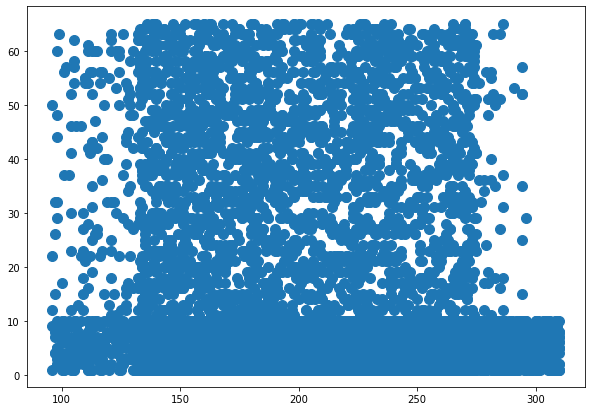

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(ama["Cost_of_the_Product"],ama["Discount_offered"],s = 100)

* Here we can observe the scattered plot for the columns cost of the product and Discount offered.
------------

* Agglomerative Clustering algorithm for the column Cost of the product and discount offered.

In [ ]:
cl = ama[['Cost_of_the_Product','Discount_offered']]
cluster = AgglomerativeClustering(n_clusters= 4, affinity = 'euclidean',linkage = 'ward')
clc_pre = cluster.fit_predict(cl)
clc_pre

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
ama['cluster']=clc_pre
ama[['Cost_of_the_Product','Discount_offered','cluster']].head()

Cost_of_the_Product  Discount_offered  cluster
0                  177                44        0
1                  216                59        1
2                  183                48        0
3                  176                10        0
4                  184                46        0

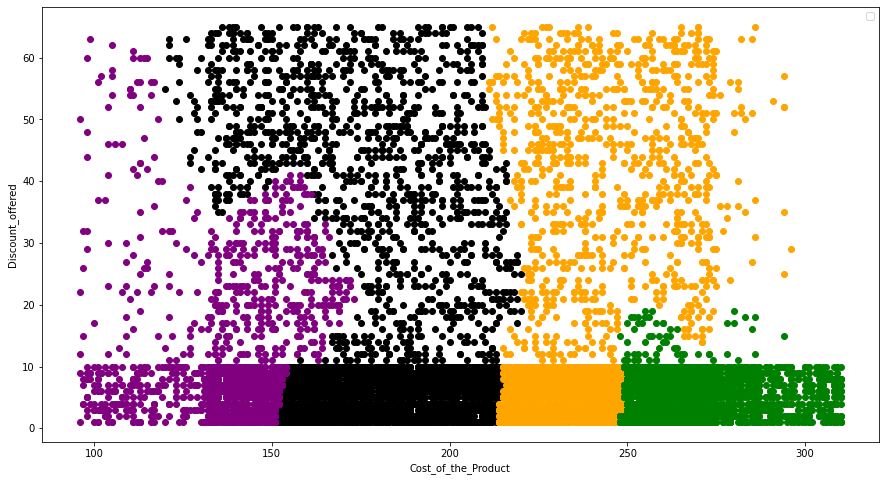

In [ ]:
df1 = ama[ama.cluster==0]
df2 = ama[ama.cluster==1]
df3 = ama[ama.cluster==2]
df4 = ama[ama.cluster==3]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='black')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='orange')
plt.scatter(df3['Cost_of_the_Product'],df3['Discount_offered'],color='purple')
plt.scatter(df4['Cost_of_the_Product'],df4['Discount_offered'],color='green')

plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()

* Here we can see from the above there are 4 clusters, divided from 100 to 150, 150 to 220, 220 to 250 and 250 to 300.
-----------

# 7) Dendogram
> * Here we used `linkage()` function to link the average value of the sampled data of our dataframe.
* Then used `dendrogram()` funciton to plot the hierarchical clustering dendogram.

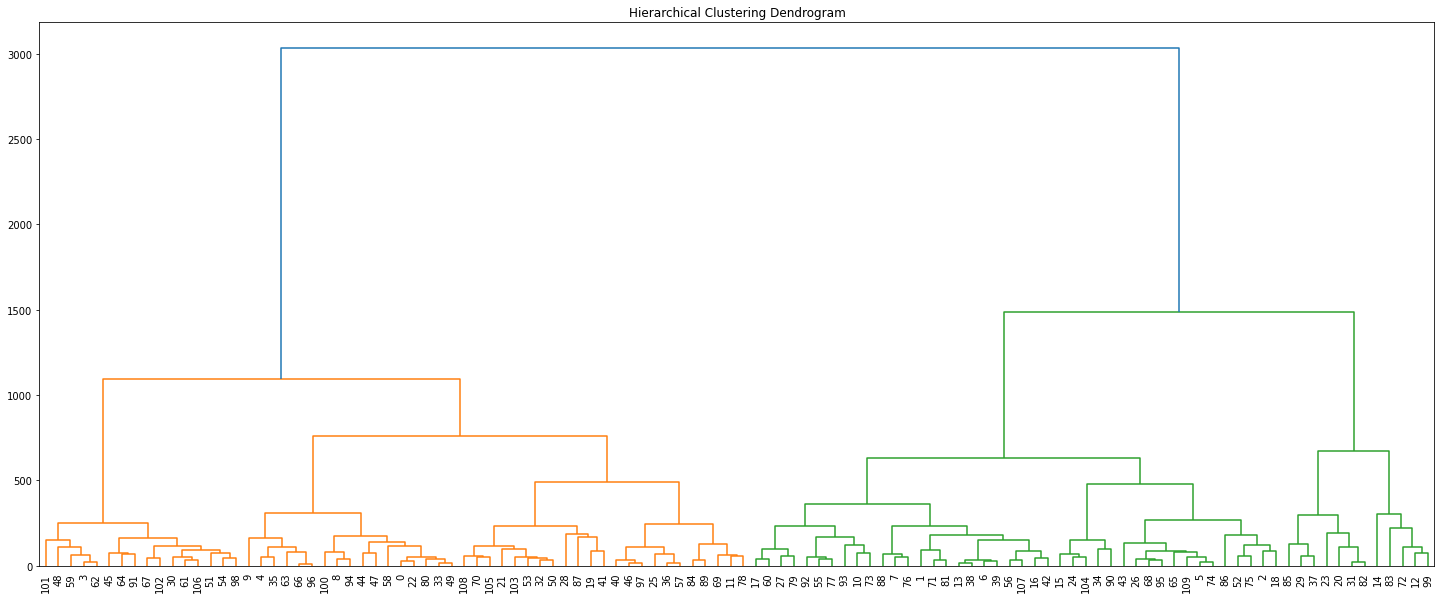

In [ ]:
Z = linkage(ama.sample(frac = 0.01), 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size = 10)
plt.show()


* Here we can observe from the above dendogram have 3 main clusters in the sample data we took from our dataset. 
-------------
## Unsupervised Clustering

# 8) Step-by- step K-means
> * We used `.scatter()` function to plot the scatter between the columns Cost_of_the_product and Discount offered.

Text(0, 0.5, 'Discount_offered')

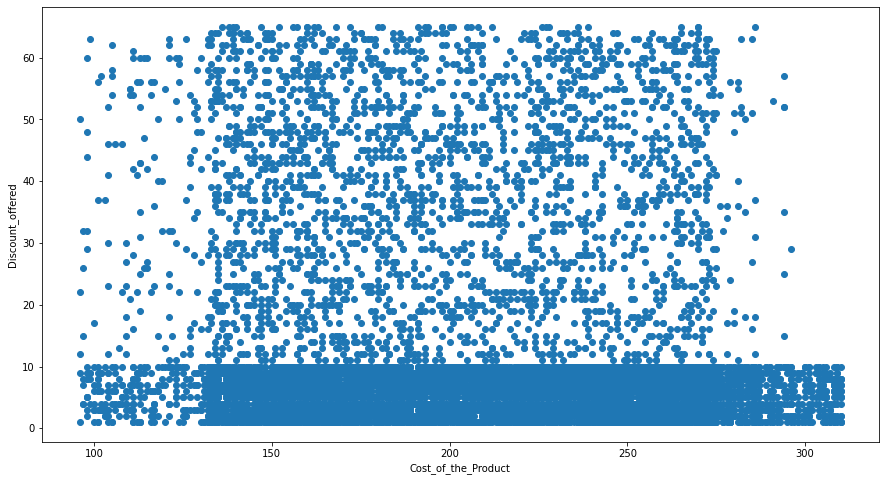

In [ ]:
#Visulaize the 2 Features
plt.scatter(ama["Cost_of_the_Product"],ama['Discount_offered'])
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')

* Here we can see one cluster between 0 to 10 discount offered.
--------------
* Now we fitted the `MinMaxScalar()` on columns Cost of the product and discount offered. and transfered that into our dataframe.

In [ ]:
#Preprocessing using min max scaler
scaler = MinMaxScaler()
scaler.fit(ama[['Discount_offered']])
ama['Discount_offered'] = scaler.transform(ama[['Discount_offered']])
scaler.fit(ama[['Cost_of_the_Product']])
ama['Cost_of_the_Product'] = scaler.transform(ama[['Cost_of_the_Product']])
ama[['Cost_of_the_Product','Discount_offered']].head()

Cost_of_the_Product  Discount_offered
0             0.378505          0.671875
1             0.560748          0.906250
2             0.406542          0.734375
3             0.373832          0.140625
4             0.411215          0.703125

* Here we used to `Kmean()` functionto create a KMean clustering model with 2 cluster and random initialization.




In [ ]:
km = KMeans(n_clusters=2,random_state=42) #n_initint, default=10
y_predicted = km.fit_predict(ama[['Cost_of_the_Product','Discount_offered']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

* Here we use `cluster_centers_` to find the centroid of the clusters.
* Then we added cluster in the dataframe.

In [ ]:
km.cluster_centers_

array([[0.46140251, 0.70407845],
       [0.54872181, 0.08661244]])

In [ ]:
ama['cluster']=y_predicted
ama[['Cost_of_the_Product','Discount_offered','cluster']].head()

Cost_of_the_Product  Discount_offered  cluster
0             0.378505          0.671875        0
1             0.560748          0.906250        0
2             0.406542          0.734375        0
3             0.373832          0.140625        1
4             0.411215          0.703125        0

* From the above results we plot the scatter plot using `scatter()` function between and Cost_of_the_product and Discount_offered and we have marked the centroid with **X**.

Inertia of Kmeans with 2 Clusters:  648.411937989325


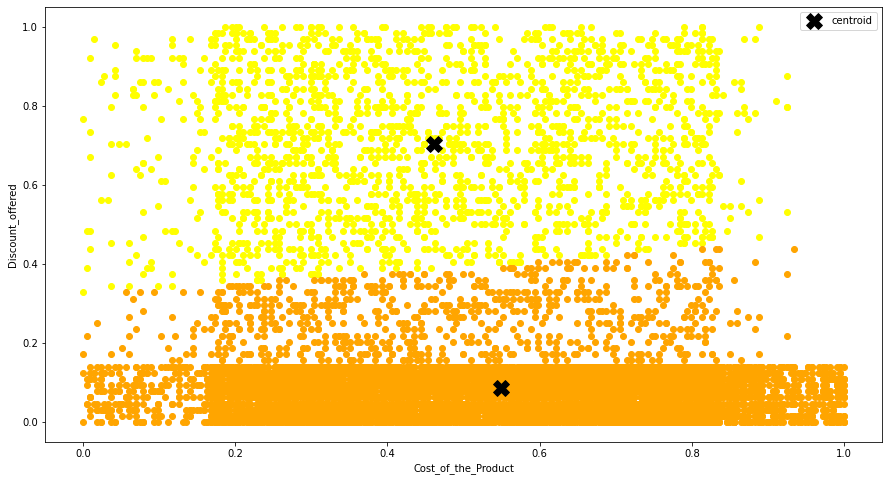

In [ ]:
#Visualize Kmeans with 2 clusters
df1 = ama[ama.cluster==0]
df2 = ama[ama.cluster==1]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='yellow')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',
            marker='X',s=250, label='centroid',)
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
ama["Cost_of_the_Product"],ama['Discount_offered']
print("Inertia of Kmeans with 2 Clusters: ", km.inertia_)

* From the above plot we can observe the 2 clusters of our DataFrame and their centorids, Marked with **X**.
----------------

* Now we sets up the KMeans algorithm with two clusters, random state and initial number of centroids.
* Then we plot the same scatter plot with the same columns.


Inertia of Kmeans with 2 Clusters:  648.411937989325


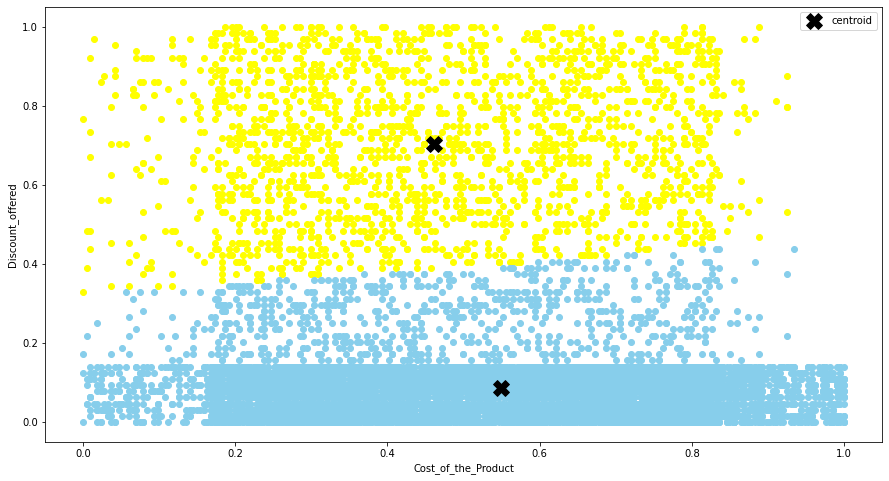

In [ ]:
#Visualize the Kmeans 2 clusters with n_init =1
#n_initint
#Number of time the k-means algorithm will be run with different centroid seeds. 
#The final results will be the best output of n_init consecutive runs in terms of inertia.
km2 = KMeans(n_clusters=2,random_state=42, n_init=1) 
y_predicted = km2.fit_predict(ama[['Cost_of_the_Product','Discount_offered']])
y_predicted
df1 = ama[ama.cluster==0]
df2 = ama[ama.cluster==1]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='yellow')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='skyblue')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='black',marker='X',s=250, label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
ama["Cost_of_the_Product"],ama['Discount_offered']
print("Inertia of Kmeans with 2 Clusters: ", km2.inertia_)

-------------
* Now we created an instance of KMeans, which takes in two parameters: n_clusters and init_centers. 
* Then we performed the Elbow Method.

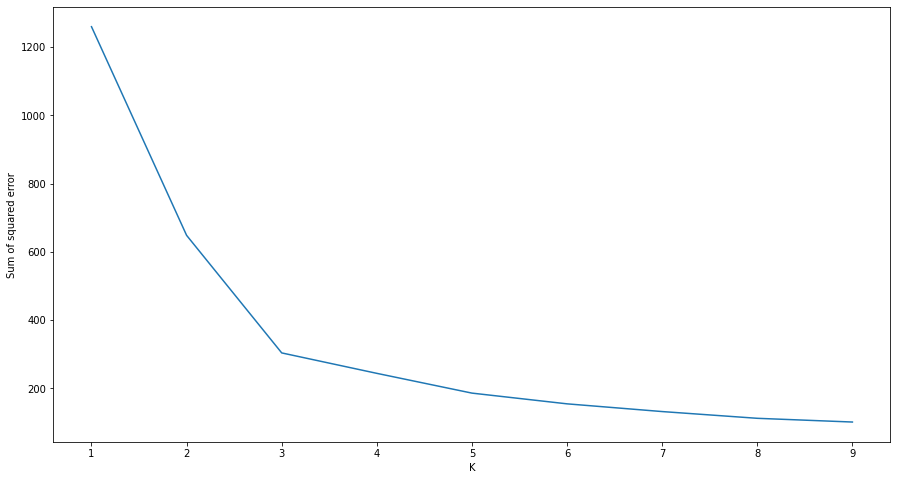

In [ ]:
#Elbow Method

#Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE)
#between data points and their assigned clusters’ centroids. 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km2 = KMeans(n_clusters=k)
    km2.fit(ama[['Cost_of_the_Product','Discount_offered']])
    sse.append(km2.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

* The graph above shows that k=3 is not a bad choice. Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.

* That is why we will try K=3 in the coming analysis and check the results.



Inertia of Kmeans with 3 Clusters:  303.93524178094395


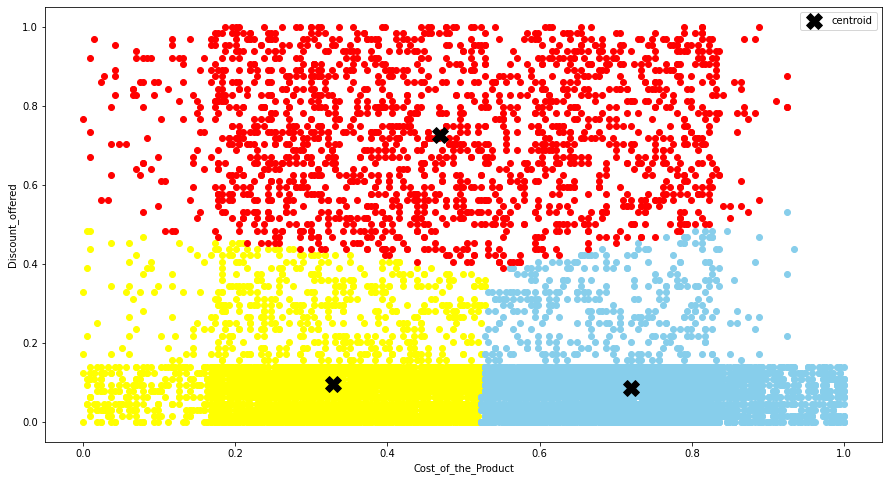

In [ ]:
#Kmeans with K= 3 
km3 = KMeans(n_clusters=3,random_state=42 )
y_predicted = km3.fit_predict(ama[['Cost_of_the_Product','Discount_offered']])
ama['cluster']=y_predicted

df1 = ama[ama.cluster==0]
df2 = ama[ama.cluster==1]
df3 = ama[ama.cluster==2]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='yellow')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='skyblue')
plt.scatter(df3['Cost_of_the_Product'],df3['Discount_offered'],color='red')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='black',marker='X',s=250, label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
ama["Cost_of_the_Product"],ama['Discount_offered']
print("Inertia of Kmeans with 3 Clusters: ", km3.inertia_)

* We created a KMeans object with 3 clusters and sets it to use random initialization.

-------

* Then we created a KMeans object with 4 clusters and sets it to use random initialization.

Inertia of Kmeans with 4 Clusters:  244.06101571191925


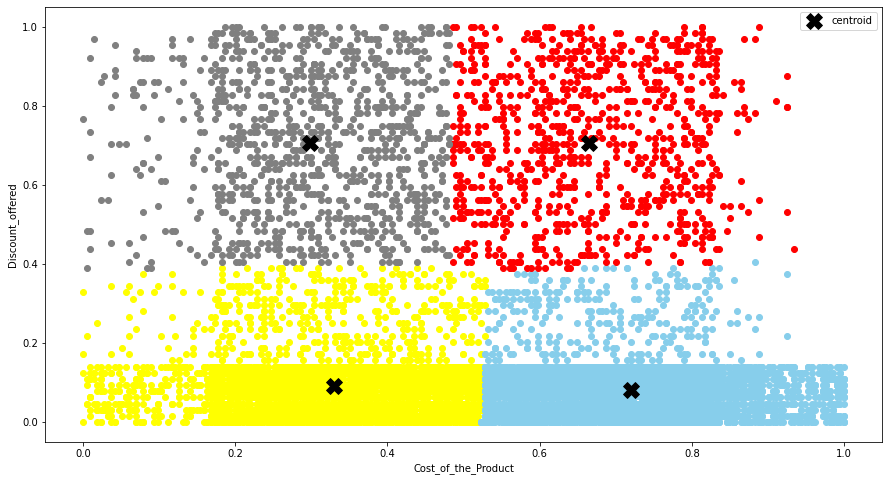

In [ ]:
#Kmeans with K= 4
km4 = KMeans(n_clusters=4,random_state=42)
y_predicted = km4.fit_predict(ama[['Cost_of_the_Product','Discount_offered']])
ama['cluster']=y_predicted

df1 = ama[ama.cluster==0]
df2 = ama[ama.cluster==1]
df3 = ama[ama.cluster==2]
df4 = ama[ama.cluster==3]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='yellow')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='skyblue')
plt.scatter(df3['Cost_of_the_Product'],df3['Discount_offered'],color='red')
plt.scatter(df4['Cost_of_the_Product'],df4['Discount_offered'],color='gray')

plt.scatter(km4.cluster_centers_[:,0],km4.cluster_centers_[:,1],color='black',marker='X', s=250, label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
ama["Cost_of_the_Product"],ama['Discount_offered']
print("Inertia of Kmeans with 4 Clusters: ", km4.inertia_)

* It prints out all four predictions for Cost of the Product, Discount Offered, and Cluster Centroids for each cluster.

-------------

# 9) Unsupervised knn using sklearn.cluster

> * Here we created the KMeans algorithm with three clusters and initializes it to use "k-means++".
* Then we found out the centriod.
* Then we applied PCA on our dataframe and transformed into a new dataframe called df.
* Then we initialized kmeans with 3 clusters and used `fit_predict()` to predict which cluster an observation belongs to.


In [ ]:
#K-means
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cl_df = ama[['Cost_of_the_Product', 'Discount_offered']]
cl_df = cl_df.iloc[:4500,:]

#cl = ama[:2000,:]

In [ ]:
kmeans = cluster.KMeans(n_clusters=3, init = "k-means++").fit(cl_df)
kmeans = kmeans.fit(cl_df[['Cost_of_the_Product', 'Discount_offered']])

In [ ]:
skcluster = kmeans.cluster_centers_
skcluster

array([[0.47429907, 0.19270833],
       [0.31103972, 0.65869141],
       [0.65043134, 0.69290865]])

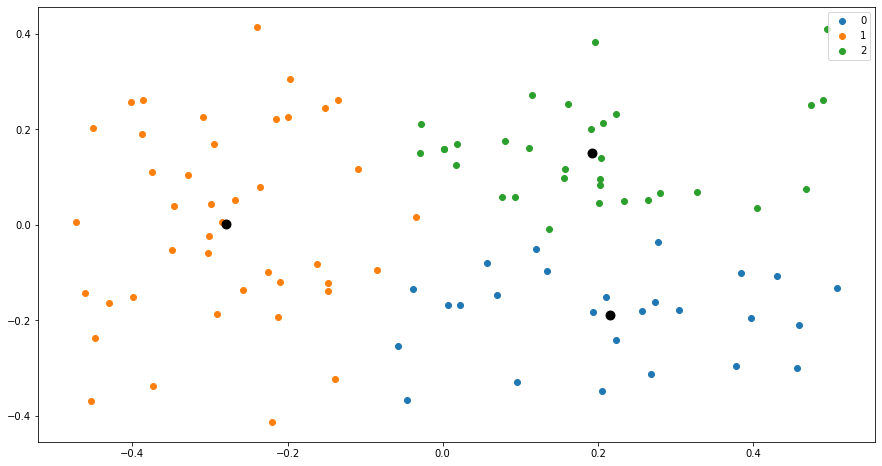

In [ ]:
#Importing required modules
from sklearn.decomposition import PCA

#Principal component analysis
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(cl_df)
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

* From the above graph we can observe that 3 centroids are obtained from KMeans and plotted against their corresponding labels

-----------
# 10) KNN

> * First we locked the data so that we can use visualize the KNN function easily.
* First we ploted the scatter plot between Product_total_cost and Weight_in_grms.

In [ ]:
ama = ama.iloc[:5000,:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(0, 0.5, 'Weight_in_gms')

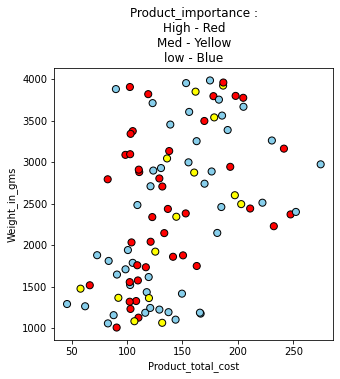

In [ ]:
fig = plt.figure(figsize=(5,5))


colormap = np.array(['', 'red', 'skyblue', 'yellow'])
 
plt.scatter(ama.Product_total_cost, ama.Weight_in_gms, 
            c = colormap[ama.Product_importance], edgecolor = 'black', s = 50)
plt.title('Product_importance :\nHigh - Red\nMed - Yellow\nlow - Blue')
ax = fig.add_subplot(111)
ax.set_xlabel('Product_total_cost')
ax.set_ylabel('Weight_in_gms')

* Here we can analyze from the above plot that red ones are product have high importance and yellow and blue are for medium and low product importance respectively.
----------------
* Now we used `knn.fit()` function to make the prediction for the number of rings of each of the abolanes in our data and compare those results to the known true numbers of rings.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, 
                           p = 2)# p=2 for euclidean distance
knn.fit(ama[["Product_total_cost", "Weight_in_gms"]], 
        ama.Product_importance)

KNeighborsClassifier(n_neighbors=3)

* First we defined the `plotMesh()`.
* Then we created colormaps and the putted result into color plot and plotted the scatter plot of product_total_cost and Weight_in_gms. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



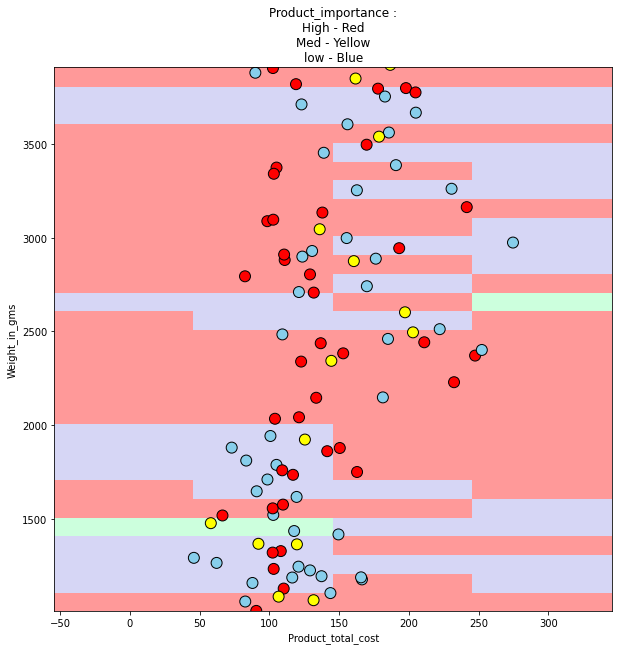

In [ ]:
def plotMesh():
    h = 100 
    # Create color maps
    cmap_light = ListedColormap(['#ff9999','#d6d6f5','#ccffdd'])
    colormap = np.array(['', 'red', 'skyblue', 'yellow'])

    x_min, x_max = ama.Product_total_cost.min() - 100, ama.Product_total_cost.max() + 100
    y_min, y_max = ama.Weight_in_gms.min() , ama.Weight_in_gms.max() 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)


    # Plot also the training points
    plt.scatter(ama.Product_total_cost, ama.Weight_in_gms, c = colormap[ama.Product_importance], edgecolor = 'black', 
                s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Product_importance :\nHigh - Red\nMed - Yellow\nlow - Blue')
    ax = fig.add_subplot(111)
    ax.set_xlabel('Product_total_cost')
    ax.set_ylabel('Weight_in_gms')
plotMesh()

* From above graph we conclude that the red ones are product have high importance and yellow and blue are for medium and low product importance respectively.

------

* Now we make prediction by using `knn.predict()` function.

Product_total_cost: 345
Weight_in_gms: 5433


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Prediction: Importance # 2 skyblue


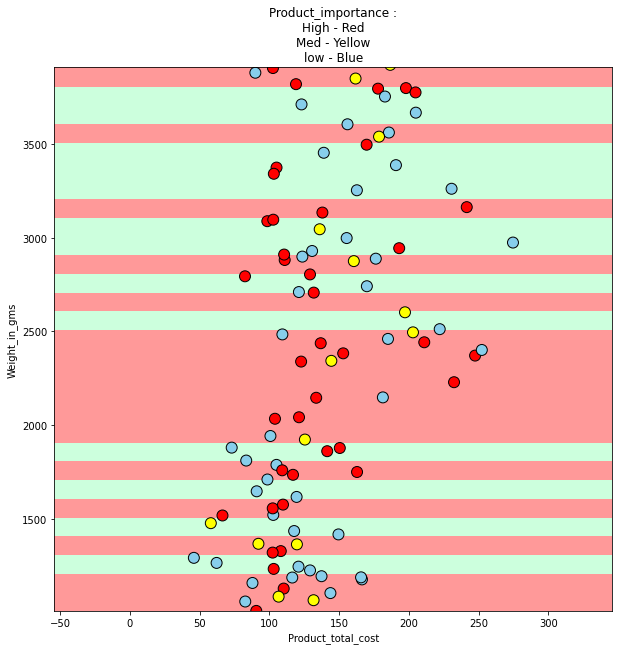

In [ ]:
# make prediction
Cost = int(input('Product_total_cost: '))
Weight = int(input('Weight_in_gms: '))
data_class = knn.predict(np.array([Cost, Weight]).reshape(1, -1))[0]
class_name = ['', 'red', 'skyblue', 'yellow']

print('Prediction: Importance #', data_class, class_name[data_class])

knn.fit(ama[["Cost_of_the_Product", "Weight_in_gms"]], ama.Product_importance)
plotMesh()

* Now we get the prediction the product importance by inputing random values of the cost of the product and the weight of the product.

-------------
# 11) Report
--------------
This report is generated for **Amazon services** that provides insight about their product importance and if their any correlation between their Product cost and weight of the product and any discount offered on that item. Using this insight we can determine insight on customer satisfaction by using customer rating as a medium.

### Objective 

* E-Commerce web applications have a big influence on people today. Businesses like Amazon and meal delivery services like DoorDash and Ubereats have challenges including providing the best customer service, shipping orders on time, and increasing consumer happiness.
* The timely delivery of shipments, customer discounts, customer ratings, and customer care call services are all intimately related to consumer satisfaction in e-commerce applications. There is a greater likelihood that the *product to be important* if the customer satisfaction, customer rating, discounts offered, and customer services are higher.

### Exploratory Data Analysis

#### Data Collection
* The data set that we collected was available on Kaggle. Link The data set that we collected was a data set containing all the information of the product and their purchase and warehouse from where they are shiped and their importance. Our data set contained both basic and advanced statistics of the product sold online by the online application.

#### Data Cleaning
* Initially our data set contained 10,999 rows and 12 columns. This translates to 10999 observations across 12 variables, or 10,999 players and their statistics across 12 categories. For the purpose of this investigation, we were interested in obtaining the cluster analysis prediction of the product importance based on weight of the product and cost of the product. For this reason we dropped all ID of the customers from our dataset. We did not have any NA/NULL values so there was no need to drop any rows.

#### Data Adaptation
Firstly, we created two columns, one for the delivery charges which is directly depend on the mode of shipment:


*   For flight :- Delivery charges varies from 21 to 30.
*   For ship   :- Delivery charges varies from 11 to 20.
*   For road   :- Delivery charges varies from 00 to 10.

Second Column we created was Total_product_cost which depend on the cost of the product, discount offered and delivery charges.

### Data Visualization
* Given that our dataset had some unwanted column which has no use in the further process was removed after data cleaning. After removing such data set, we were able to produce visualizations to help us better understand what the information contained by our data set looked like. To get an idea of the correlation of all the numerical columns in the data set, we created a corrplot showing the correlation of all the columns. This told us that there is strong co-relation between Cost_of_the_product and Product_total_cost. The corrplot is shown below:




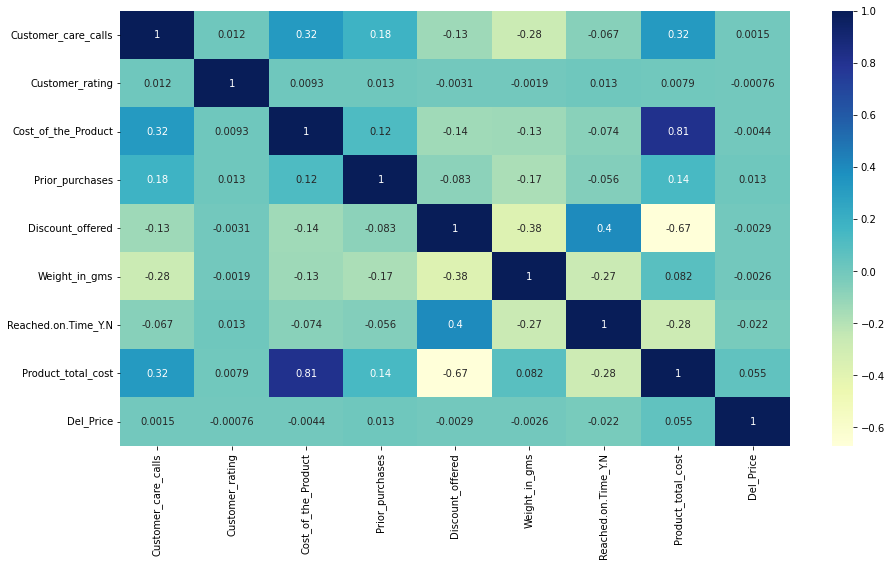

In [ ]:
#Checking correlation
plt.rcParams["figure.figsize"] = (15, 8)
sns.heatmap(ama_origin.corr(), cmap="YlGnBu", annot=True);

The second visualization we made was a bar plot that shows the count of all the columns of the data in the dataframe. The plot gives us following information:

- Warehouse F has the highest value counts as compared to other four.
- In the second plot we can conclude that, mostly used way of delivery is through ship.
- From the third plot we can conclude that, most of the product have 4 customer care call services.
- 4th plot we can see that number of customer ratings have almost same count.
- In the 5th plot we can see that most of the product are purchased atleast 3 times.
- 6th plot suggest that number of product having high importance are very low.
- Comparing the gender columns from the barplot we see that the number of female and male purchased the product are almost same.
- From 8th plot we can see that most of the product is reaching on time compare to others.
- In the 9th plot we can see that total product cost are not equal as they are likely depended on the mode of shipment delivery charges.
- Lastly, from the 10th plot we can see most of the product have delivery charges between 11 to 20 as the most of the product are shipped through ship.

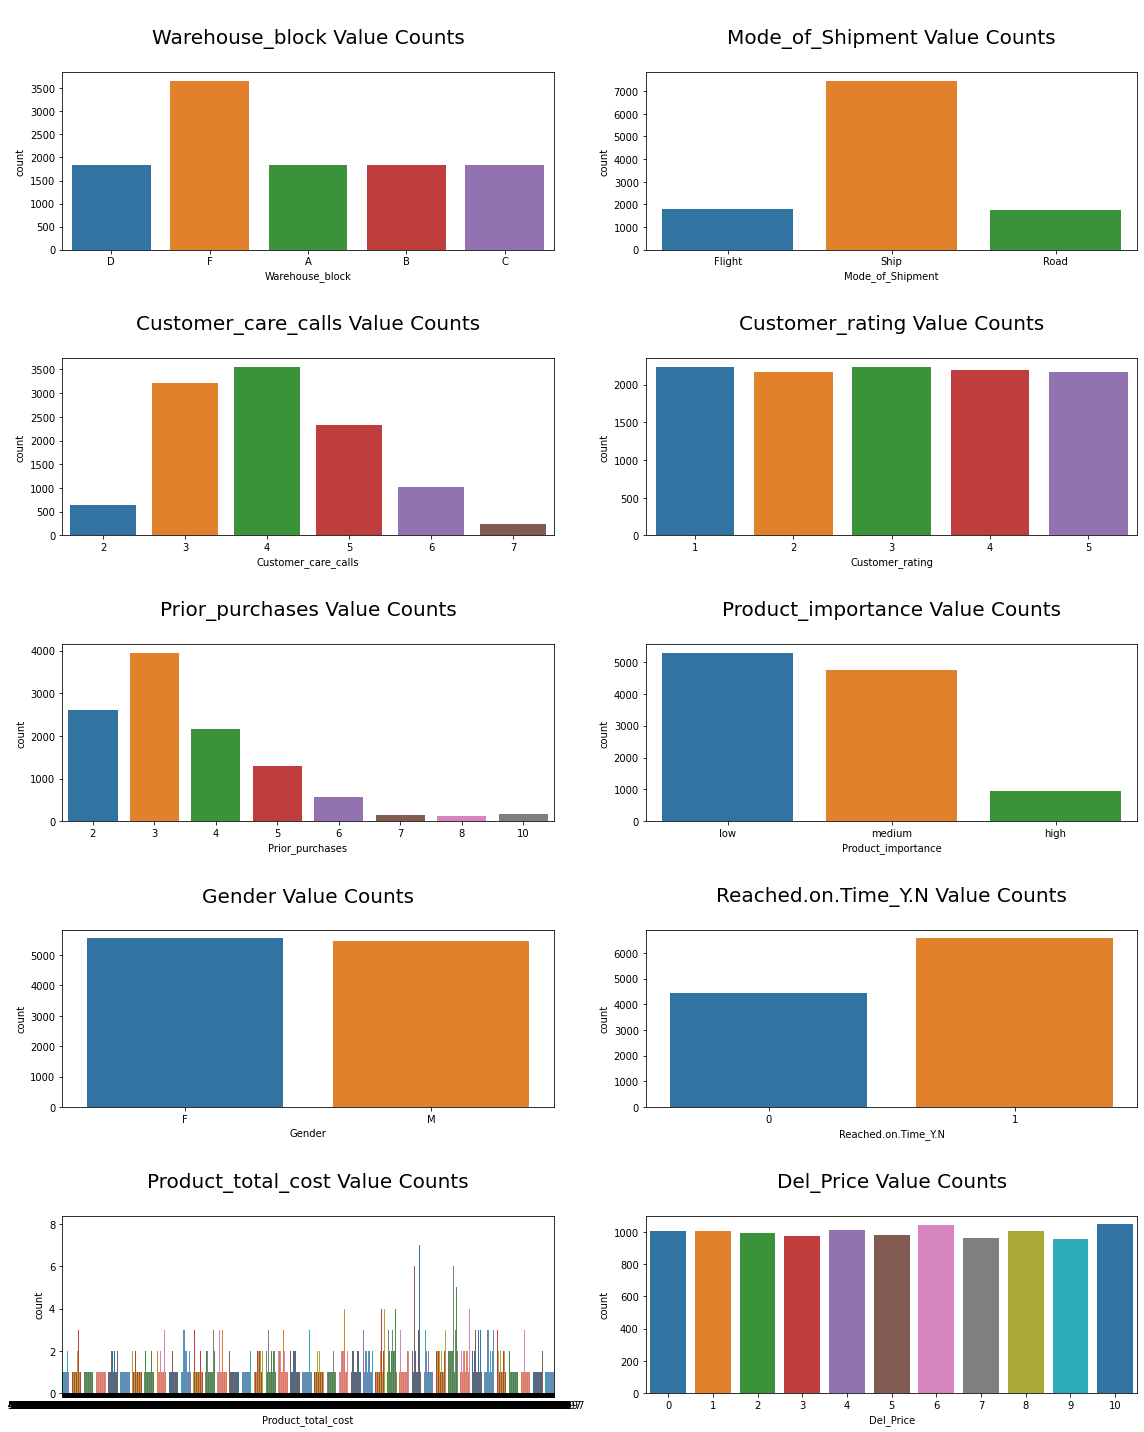

In [ ]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N','Product_total_cost','Del_Price']

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = ama_origin, ax = ax, palette='tab10')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

The third visualization we created was a pie charts. In this charts, we concluded 
1.  Ware_house_block: **Block F** have the highest number of product that is *33.33%* and other blocks have almost the same number of product.
2. Mode_of_shipment: Most of the product are transported by **ship** and it has the stack of *67.8%*.
3. Product_importace: *48.2%* of the products have **low** importance and the product with **high** importance are only *8.62%*.
4. Gender: Here we can see the minor different between the genders who ordered the products from the web application that is 0.8%. The pie chart is shown below:

In [ ]:
cat_col =["Warehouse_block","Mode_of_Shipment","Product_importance","Gender"] #Using categorical columns to make a pie chat
ama_cat = ama_origin[cat_col]

for i in range(len(cat_col)):
    warehouse = ama_cat.iloc[:,i].value_counts().reset_index()
    warehouse.columns = [ama_cat.columns[i], 'value_counts']
    fig = px.pie(warehouse, names = ama_cat.columns[i], values = 'value_counts', title=ama_cat.columns[i],
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,hole = 0.5)
    fig.update_layout(title_x = 0.5, title_y = 0.85)
    fig = fig.update_traces(textinfo = 'percent+label')
    fig.show()

> Below are the images of the pie chart that was created, this code works fine in colab notebook but it has issue in juypter and when converted into a html file, the visualization are blank hence i have attached them as images.

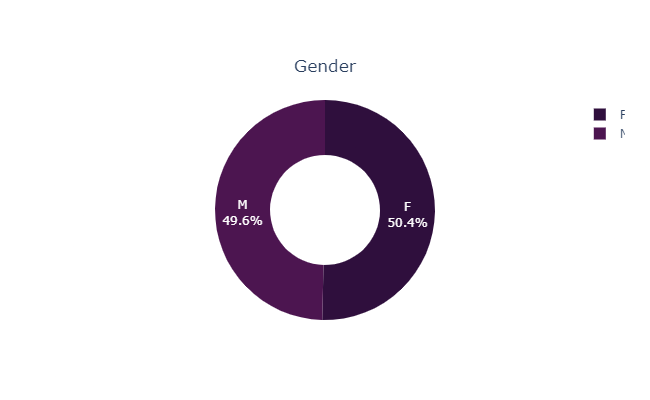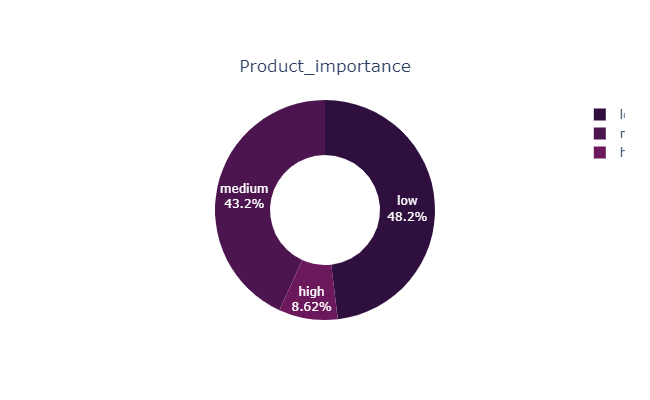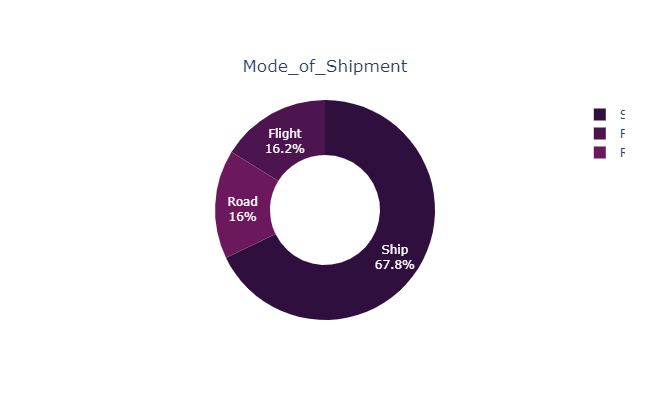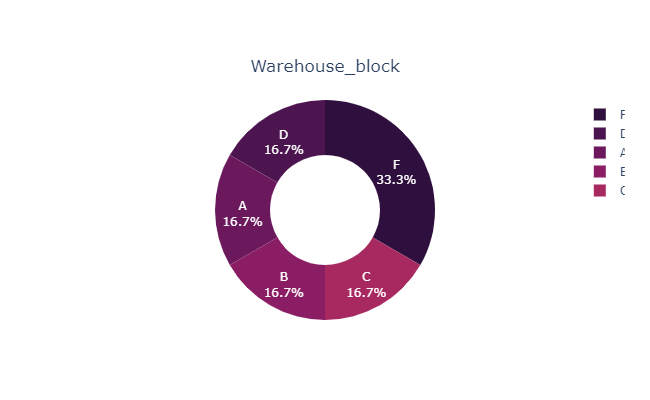



The final visualization we created was a pair plot. that the columns weight in grams and Cost of the product shows some clusters in the scattered plot.

- Similarly, columns weight in gram and delivery price, Discount offered and Cost of product and Delivery price and product total cost shows some cluster in the plot.
which we can use in the further analysis. The pair plot is shown below.

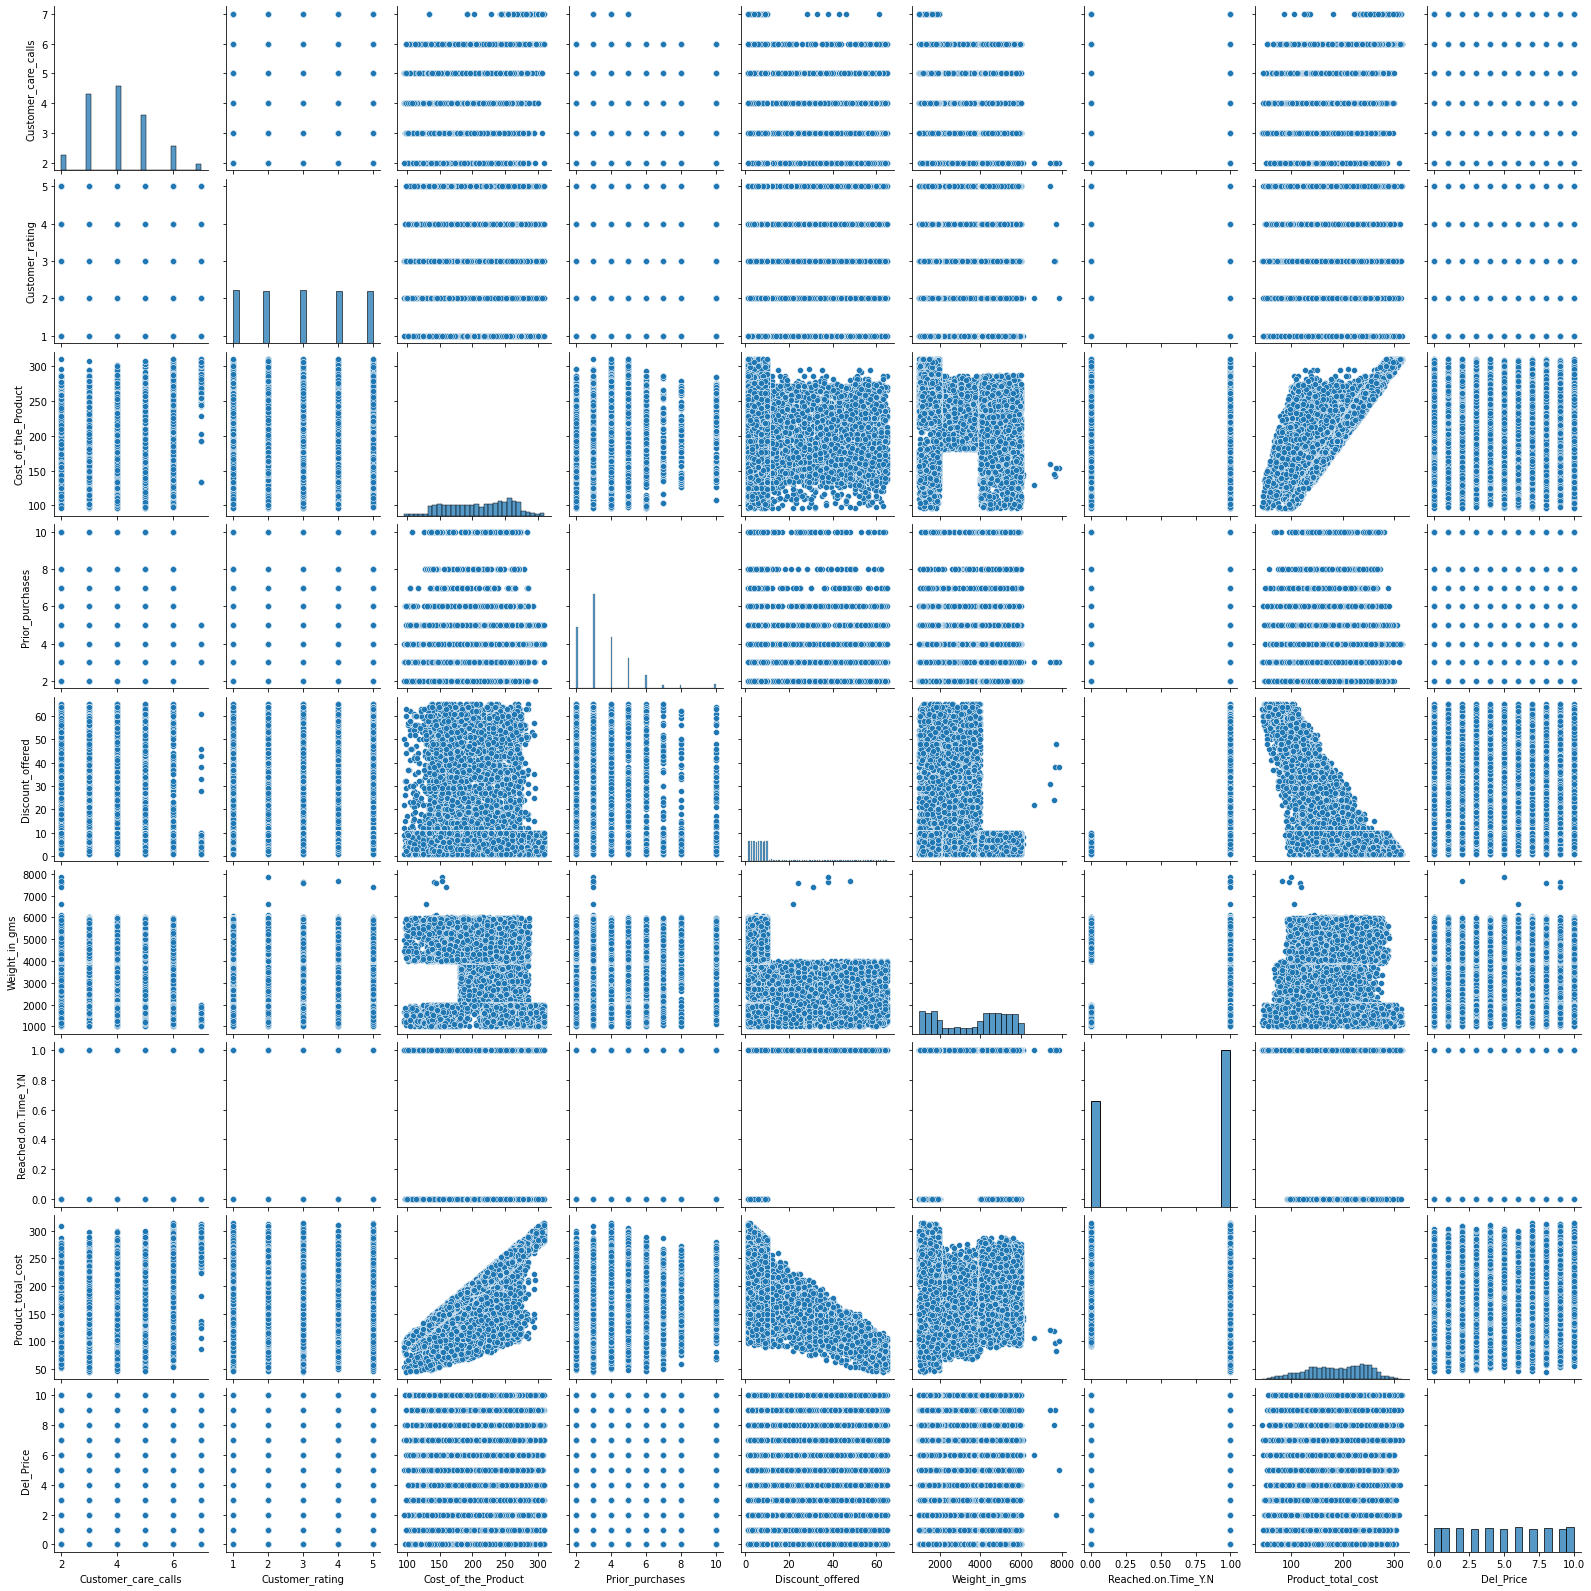

In [ ]:
sns.pairplot(ama_origin)

###Cluster Analysis
Once we completed some visualizations of our data, we had a good understanding of the data available to us. The next step before we began making prediction was to do cluster analysis. The hierarchical clustering below shows the clusters in a scatter plot, plotted between Cost of the product and Weight in gms. The cluster analysis is shown below.

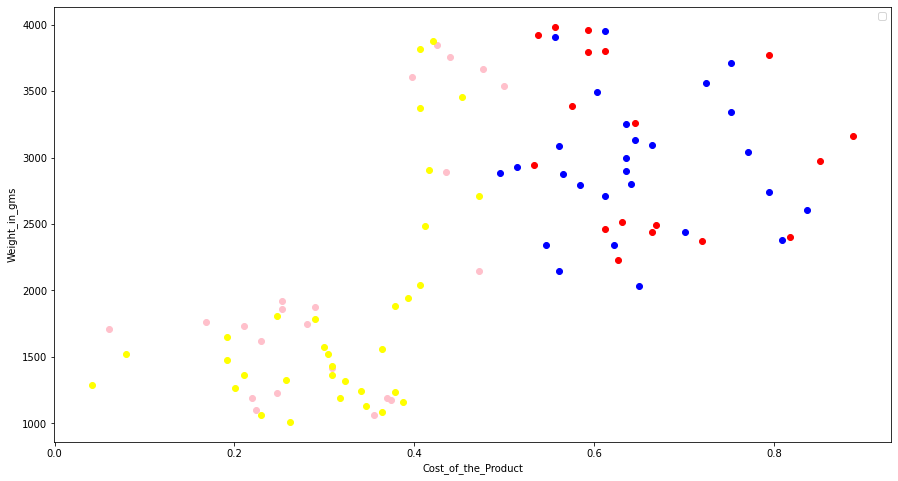

In [ ]:
df1 = ama[ama.cluster==0]
df2 = ama[ama.cluster==1]
df3 = ama[ama.cluster==2]
df4 = ama[ama.cluster==3]
plt.scatter(df1['Cost_of_the_Product'],df1['Weight_in_gms'],color='pink')
plt.scatter(df2['Cost_of_the_Product'],df2['Weight_in_gms'],color='red')
plt.scatter(df3['Cost_of_the_Product'],df3['Weight_in_gms'],color='Blue')
plt.scatter(df4['Cost_of_the_Product'],df4['Weight_in_gms'],color='Yellow')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Weight_in_gms')
plt.legend()

####Dendogram
We plotted a dendogram by sampling the data to get the perfect view of the plot. We can see dendogram below and its cluster distribution.

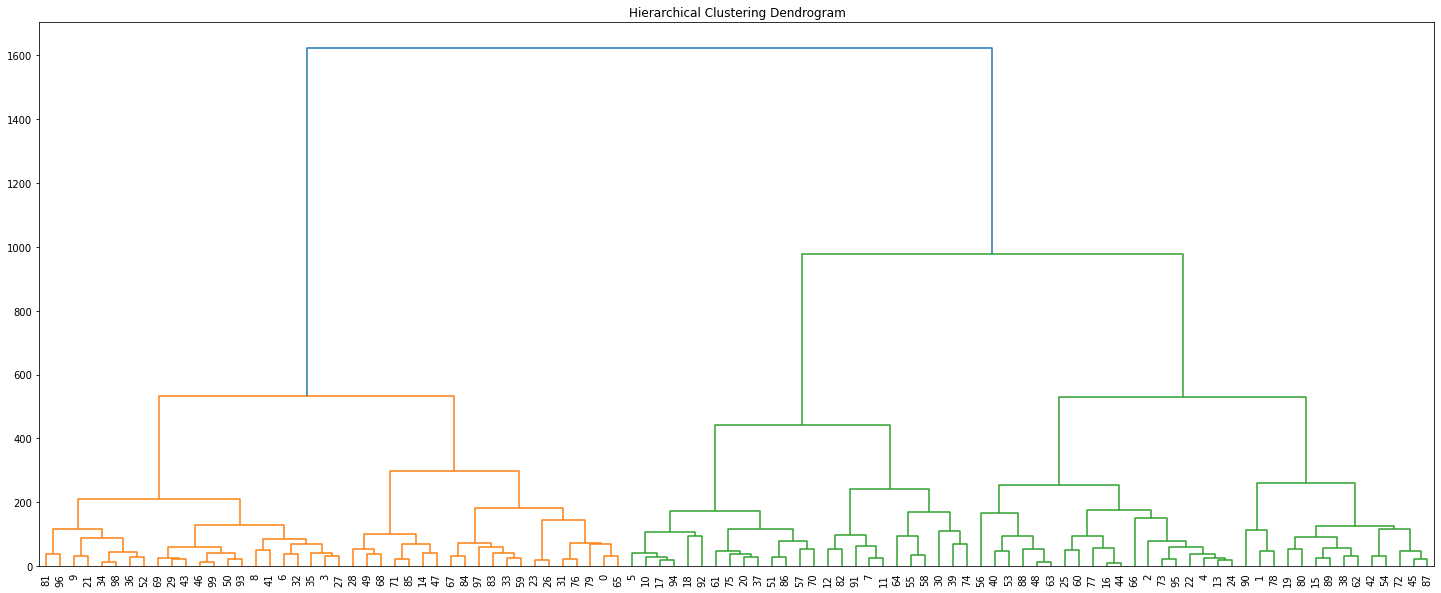

In [ ]:
Z = linkage(ama.sample(frac = 1), 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size = 10)
plt.show()

###Unsupervised Clustering

####Step-by- step K-means
- To begin with K-means, we initially plotted a scatter plot of the intended variables to see the structure of our data.
- Since our data in each column are not scaled/similar range, we will use `MinMaxScalar()` function to scale our data.
- Intially we use `Kmean()` functionto create a KMean clustering model with 2 cluster and random initialization. And use `cluster_centers_` to find the centroid of the clusters.

- One way to confirm exactly how many clusters are needed for Kmeans we made use of `Elbow` method. 

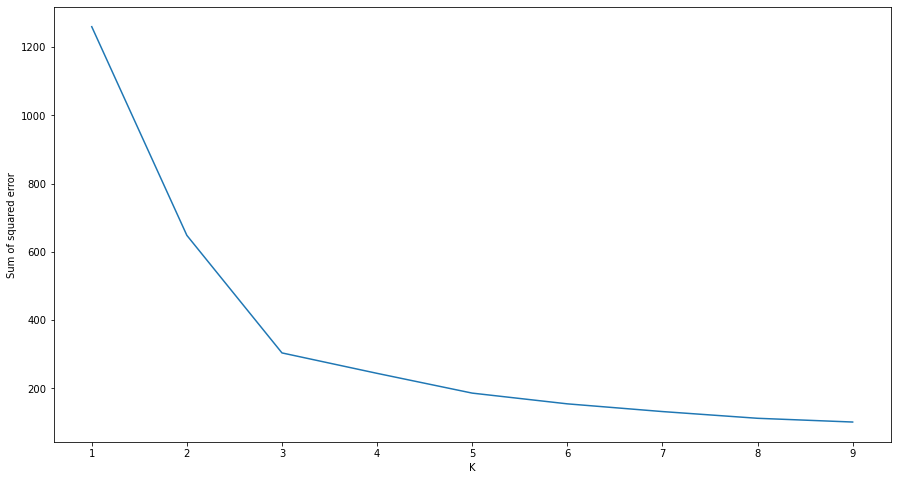

- The graph above shows that k=3 is not a bad choice. Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.

- That is why we will try K=3 in the coming analysis and check the results



Below is a scatter plot of **Cost of the product** against **Discount offere**d which depicts Kmeans clustering where cluster = 3 

Inertia of Kmeans with 3 Clusters:  4.1317978556618


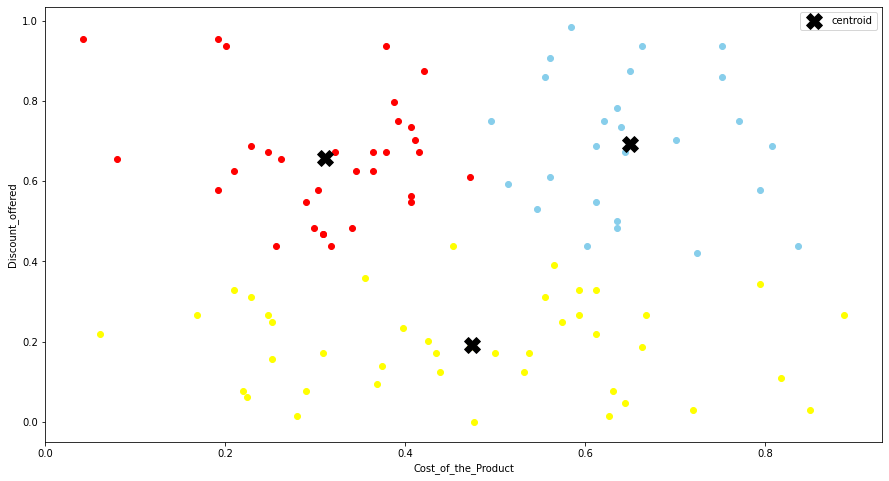

In [ ]:
#Kmeans with K= 3 
km3 = KMeans(n_clusters=3,random_state=42 )
y_predicted = km3.fit_predict(ama[['Cost_of_the_Product','Discount_offered']])
ama['cluster']=y_predicted

df1 = ama[ama.cluster==0]
df2 = ama[ama.cluster==1]
df3 = ama[ama.cluster==2]
plt.scatter(df1['Cost_of_the_Product'],df1['Discount_offered'],color='yellow')
plt.scatter(df2['Cost_of_the_Product'],df2['Discount_offered'],color='skyblue')
plt.scatter(df3['Cost_of_the_Product'],df3['Discount_offered'],color='red')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='black',marker='X',s=250, label='centroid')
plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.legend()
ama["Cost_of_the_Product"],ama['Discount_offered']
print("Inertia of Kmeans with 3 Clusters: ", km3.inertia_)

####Unsupervised knn using sklearn.cluster.
- Here we modeled the KMeans algorithm with three clusters and initializes it to use "k-means++". This is to compare with our previous 3 cluster k means plot.
Then we applied PCA on our dataframe and transformed into a new dataframe called df.
Then we initialized kmeans with 3 clusters and used fit_predict() to predict which cluster an observation belongs to.

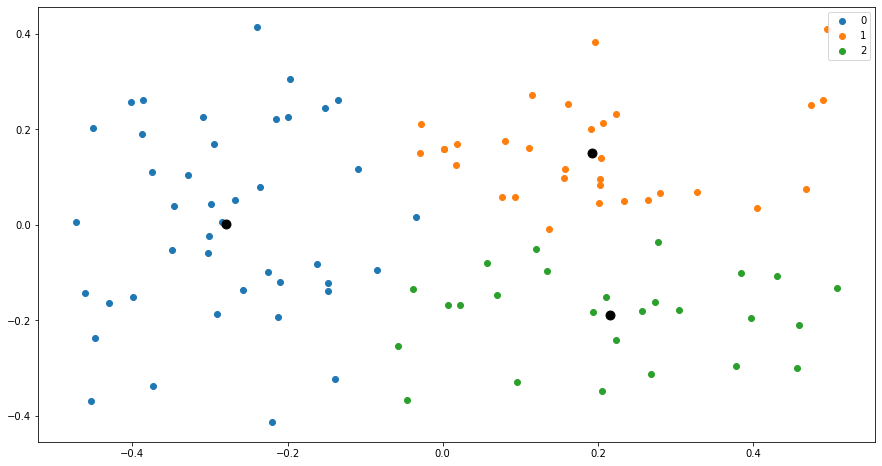

In [ ]:
#Importing required modules
from sklearn.decomposition import PCA

#Principal component analysis
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(cl_df)
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

###KNN - K Nearest Neighbour
To begin with KNN we had to sample our data to 5000 so as to easily observe the clustering since our data is huge and densely populated.
- We are finding KNN for product total cost against its weight and for color mapping, we used product importance, this is to notice and predict if products cost and weight has any importance on the product itself.

- Firstly we fit our data using `knn.fit()` function to make the prediction for the number of rings of each of the abolanes in our data and compare those results to the known true numbers of rings. 
- Then we assigned n_neighbors as 3 and plotted the data in a plotMesh().
- USing the plotmesh, we can predict Which product have either high or low importance based on their traits such as: Cost and its Weight.

Below is the code and visualization for KNN

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



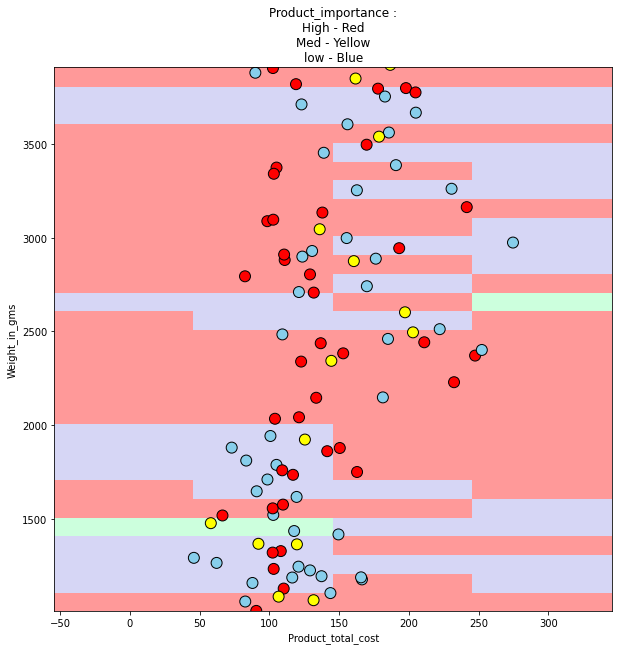

In [ ]:
def plotMesh():
    h = 100 
    # Create color maps
    cmap_light = ListedColormap(['#ff9999','#d6d6f5','#ccffdd'])
    colormap = np.array(['', 'red', 'skyblue', 'yellow'])

    x_min, x_max = ama.Product_total_cost.min() - 100, ama.Product_total_cost.max() + 100
    y_min, y_max = ama.Weight_in_gms.min() , ama.Weight_in_gms.max() 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)


    # Plot also the training points
    plt.scatter(ama.Product_total_cost, ama.Weight_in_gms, c = colormap[ama.Product_importance], edgecolor = 'black', 
                s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Product_importance :\nHigh - Red\nMed - Yellow\nlow - Blue')
    ax = fig.add_subplot(111)
    ax.set_xlabel('Product_total_cost')
    ax.set_ylabel('Weight_in_gms')
plotMesh()

### Conclusion/Findings
The best number of cluster to be used is 3 as we checked with the elbow method and inertia. They both suggest the best approach is with 3 clusters.
And for KNN, we used product total cost against it's weight in grams to predict the product importance on scatter plot.
 

Originality of the project - This dataset was not created by us rather it was imported from Kaggle "https://www.kaggle.com/code/hasn717/e-commerce-shipping-data-full-end-to-end-68-5/data". We did not refer or copy anyones work from the internet. But, there might be some scenarios where we could have used the same variables to predict the similar output as others on the web and also could have used the same visualization to present our graphs. 
We came across a similar work that used the same datset "https://www.kaggle.com/code/karthikn24/shipping-data-analysis#Data-Visualization"
but, the published work and our project are less than 5% similar.
- Although we reached to stack overflow and other multiple website for reference, doubts and errors, this work solely belongs to us